In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
# import pandas as pd
# import seaborn as sns
# import sklearn

# sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import keras

Using TensorFlow backend.


In [3]:
activations = [
    'elu', 'exponential', 'hard_sigmoid', 'linear', 'relu', 'selu', 'sigmoid',
    'softplus', 'softsign', 'tanh'
]

In [4]:
x = np.linspace(-3, 3, num=int(1e3)).reshape(-1, 1)

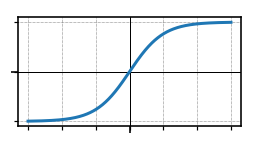

In [5]:
figsize(2, 1)

for i, act in enumerate(activations):
    act_model = keras.Sequential(
        [keras.layers.Activation(act, input_shape=(1, ))])
    act_model.compile("sgd", loss="hinge")
    y = act_model.predict(x)

    plt.clf()
    plt.plot(x, y)

    ax = plt.gca()
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(1))

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(10))

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.grid(which='major', linestyle='-', linewidth='0.5', color="black")
    ax.grid(which='minor', linestyle=':', linewidth='0.25', color="black")

    plt.savefig(f"{act}.svg", bbox_inches='tight', transparent=True)

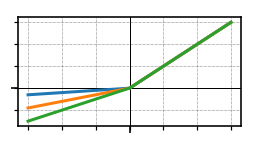

In [6]:
from functools import partial

for a in [.1, .3, .5]:
    act_model = keras.Sequential([
        keras.layers.Activation(
            partial(keras.activations.relu, alpha=a), input_shape=(1, ))
    ])
    act_model.compile("sgd", loss="hinge")
    y = act_model.predict(x)

    plt.plot(x, y)

ax = plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.grid(which='major', linestyle='-', linewidth='0.5', color="black")
ax.grid(which='minor', linestyle=':', linewidth='0.25', color="black")

plt.savefig(f"LeakyRelu.svg", bbox_inches='tight', transparent=True)